# In context learning and Prompt engineering

In [91]:
# NEW VERSION
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM, pipeline
import numpy as np
import os

#project_root = r'C:\Users\daria\OneDrive\Escritorio\UCL\Dissertation\Negations-LM\notebook'

#C:\Users\daria\OneDrive\Escritorio\UCL\Dissertation\Negations-LM\context\incontext.py
#os.chdir(project_root)

print("Current Working Directory:", os.getcwd())
from incontext import PerturbationGenerator

# Example usage
text = "The project is sustainable."
random_blanks = {'The project [BLANK] sustainable', '[BLANK] project is sustainable'}

text = "The argument is complicated."
random_blanks = {'The argument [BLANK] complicated.', 'The argument is [BLANK].'}

text = "The man drank from the tap."
random_blanks = {'The man [BLANK] from the tap.', 'The man [BLANK] drank from the tap.'}

generator = PerturbationGenerator()

prompts = generator.get_prompts(text, random_blanks)
print(prompts)

generated_sequences = generator.generate_on_prompts(prompts, temperature=1, num_beams=5, do_sample=True, batch_size=128, num_return_sequences=3)

listado = generator.validate_and_sample_perturbations(generated_sequences, text, perplex_thred=10, num_perturbations=4)
print(listado)

Current Working Directory: c:\Users\daria\OneDrive\Escritorio\UCL\Dissertation\Negations-LM\context


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


['The man drank from the tap. <|perturb|> [negation] The man [BLANK] drank from the tap.', 'The man drank from the tap. <|perturb|> [negation] The man [BLANK] from the tap.']


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
INFO:polyjuice.polyjuice_wrapper:Setup SpaCy processor.


HERE
[[{'generated_text': "The man drank from the tap. <|perturb|> [negation] The man [BLANK] drank from the tap. [SEP] didn't [ANSWER] "}, {'generated_text': 'The man drank from the tap. <|perturb|> [negation] The man [BLANK] drank from the tap. [SEP] never [ANSWER] '}, {'generated_text': 'The man drank from the tap. <|perturb|> [negation] The man [BLANK] drank from the tap. [SEP] did not [ANSWER] '}], [{'generated_text': "The man drank from the tap. <|perturb|> [negation] The man [BLANK] from the tap. [SEP] didn't drink [ANSWER] "}, {'generated_text': 'The man drank from the tap. <|perturb|> [negation] The man [BLANK] from the tap. [SEP] did not drink [ANSWER] '}, {'generated_text': 'The man drank from the tap. <|perturb|> [negation] The man [BLANK] from the tap. [SEP] drank no more [ANSWER] '}]]


INFO:polyjuice.polyjuice_wrapper:Setup perplexity scorer.


['The man never drank from the tap.', 'The man did not drink from the tap.', "The man didn't drink from the tap.", 'The man drank no more from the tap.']


In [92]:
generated_sequences

[[('negation', "The man didn't drank from the tap."),
  ('negation', 'The man did not drank from the tap.'),
  ('negation', 'The man never drank from the tap.')],
 [('negation', 'The man drank no more from the tap.'),
  ('negation', "The man didn't drink from the tap."),
  ('negation', 'The man did not drink from the tap.')]]

In [90]:
#text = "The project is sustainable."
text = "The argument is credible."
random_blanks = {'The argument [BLANK] credible.', 'The argument is [BLANK].'}

examples = [
    "It is great for kids. <|perturb|> [negation] It [BLANK] great for [BLANK]. [SEP] is not [ANSWER]",
    "The weather is sunny. <|perturb|> [negation] The weather [BLANK] sunny. [SEP] is not [ANSWER]",
    "He enjoys reading books. <|perturb|> [negation] He [BLANK] enjoys reading books. [SEP] does not [ANSWER]",
    #"It is a sunny day. <|perturb|> [negation] It [BLANK] a sunny day. [SEP] is not [ANSWER]"
]

examples_affixal = [
"It is possible. <|perturb|> [negation] It is [BLANK]. [SEP] impossible [ANSWER]",
"He is satisfied. <|perturb|> [negation] He is [BLANK]. [SEP] dissatisfied [ANSWER]",
"The statement is logical. <|perturb|> [negation] The statement is [BLANK]. [SEP] illogical [ANSWER]",
#"The instructions were straightforward and uncomplicated. <|perturb|> [negation] The instructions were straightforward and [BLANK]. [SEP] complicated [ANSWER]"
"She is happy. <|perturb|> [negation] She is [BLANK]. [SEP] unhappy [ANSWER]",
"The idea is common. <|perturb|> [negation] The idea is [BLANK]. [SEP] uncommon [ANSWER]"
]

examplesd = [
    "I saw nothing at all. <|perturb|> [negation] I saw [BLANK]. [SEP] something [ANSWER]"
    "I found his story wholly convincing. <|perturb|> [negation] I found his story wholly [BLANK] convincing. [SEP] not [ANSWER]"
    "She rarely goes out these days. <|perturb|> [negation]	She [BLANK] goes out these days. [SEP] never [ANSWER]"
    "Bricks are made of clay in some context. <|perturb|> [negation] Bricks are made of clay in [BLANK] context. [SEP] no [ANSWER] "

]

examples = [
    "It is possible. <|perturb|> [negation] It is [BLANK]. [SEP] impossible [ANSWER]",
    "It is possible. <|perturb|> [negation] It is [BLANK]. [SEP] not possible [ANSWER]",
    #"He is satisfied. <|perturb|> [negation] He is [BLANK]. [SEP] dissatisfied [ANSWER]",
    "The statement is logical. <|perturb|> [negation] The statement is [BLANK]. [SEP] illogical [ANSWER]",
    "The statement is logical. <|perturb|> [negation] The statement is [BLANK]. [SEP] not logical [ANSWER]"
    "She is happy. <|perturb|> [negation] She is [BLANK]. [SEP] unhappy [ANSWER]",
    "The idea is common. <|perturb|> [negation] The idea is [BLANK]. [SEP] uncommon [ANSWER]",
    #"This action is reversible. <|perturb|> [negation] This action is [BLANK]. [SEP] irreversible [ANSWER]",
    #"The argument is credible. <|perturb|> [negation] The argument is [BLANK]. [SEP] incredible [ANSWER]",
    #"His behavior is responsible. <|perturb|> [negation] His behavior is [BLANK]. [SEP] irresponsible [ANSWER]",
    #"The phenomenon is regular. <|perturb|> [negation] The phenomenon is [BLANK]. [SEP] irregular [ANSWER]",
    #"Her decision is rational. <|perturb|> [negation] Her decision is [BLANK]. [SEP] irrational [ANSWER]"
]

text = "His behavior is always responsible."
random_blanks = {'His behavior is [BLANK] responsible.', 'His behavior is always [BLANK].'}


generator = PerturbationGenerator() 

prompt_list = generator.get_prompt_context(text,random_blanks,examples_affixal) # join the context and the inference example
print(prompt_list)

generated_sequences = generator.generate_on_prompts(prompt_list, temperature=1, num_beams=5, do_sample=True, batch_size=128, num_return_sequences=3)

valid_list = generator.validate_and_sample_perturbations(generated_sequences, text, perplex_thred=100, num_perturbations=4)
print(valid_list)


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


['It is possible. <|perturb|> [negation] It is [BLANK]. [SEP] impossible [ANSWER]\nHe is satisfied. <|perturb|> [negation] He is [BLANK]. [SEP] dissatisfied [ANSWER]\nThe statement is logical. <|perturb|> [negation] The statement is [BLANK]. [SEP] illogical [ANSWER]\nShe is happy. <|perturb|> [negation] She is [BLANK]. [SEP] unhappy [ANSWER]\nThe idea is common. <|perturb|> [negation] The idea is [BLANK]. [SEP] uncommon [ANSWER]\nHis behavior is always responsible. <|perturb|> [negation] His behavior is always [BLANK].', 'It is possible. <|perturb|> [negation] It is [BLANK]. [SEP] impossible [ANSWER]\nHe is satisfied. <|perturb|> [negation] He is [BLANK]. [SEP] dissatisfied [ANSWER]\nThe statement is logical. <|perturb|> [negation] The statement is [BLANK]. [SEP] illogical [ANSWER]\nShe is happy. <|perturb|> [negation] She is [BLANK]. [SEP] unhappy [ANSWER]\nThe idea is common. <|perturb|> [negation] The idea is [BLANK]. [SEP] uncommon [ANSWER]\nHis behavior is always responsible. <|pe

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
INFO:polyjuice.polyjuice_wrapper:Setup SpaCy processor.


HERE
[[{'generated_text': 'It is possible. <|perturb|> [negation] It is [BLANK]. [SEP] impossible [ANSWER]\nHe is satisfied. <|perturb|> [negation] He is [BLANK]. [SEP] dissatisfied [ANSWER]\nThe statement is logical. <|perturb|> [negation] The statement is [BLANK]. [SEP] illogical [ANSWER]\nShe is happy. <|perturb|> [negation] She is [BLANK]. [SEP] unhappy [ANSWER]\nThe idea is common. <|perturb|> [negation] The idea is [BLANK]. [SEP] uncommon [ANSWER]\nHis behavior is always responsible. <|perturb|> [negation] His behavior is always [BLANK]. [ANSWER] '}, {'generated_text': 'It is possible. <|perturb|> [negation] It is [BLANK]. [SEP] impossible [ANSWER]\nHe is satisfied. <|perturb|> [negation] He is [BLANK]. [SEP] dissatisfied [ANSWER]\nThe statement is logical. <|perturb|> [negation] The statement is [BLANK]. [SEP] illogical [ANSWER]\nShe is happy. <|perturb|> [negation] She is [BLANK]. [SEP] unhappy [ANSWER]\nThe idea is common. <|perturb|> [negation] The idea is [BLANK]. [SEP] unco

INFO:polyjuice.polyjuice_wrapper:Setup perplexity scorer.


['His behavior is always not responsible..', 'His behavior is always not.']


In [ ]:
prompts = generator.get_prompts(text, random_blanks)
print(prompts)

generated_sequences = generator.generate_on_prompts(prompts, temperature=1, num_beams=5, do_sample=True, batch_size=128, num_return_sequences=3)

listado = generator.validate_and_sample_perturbations(generated_sequences, text, perplex_thred=10, num_perturbations=4)
print(listado)

In [ ]:
generated_sequences

# Soft prompting with Hugging Face

### Data preprocessing

In [14]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM
import pandas as pd
from datasets import Dataset

class TextGenerationSetup:

    """
    Class used to setup the prompts format for training
    """
    
    PERETURB_TOK = "<|perturb|>"
    BLANK_TOK = "[BLANK]"
    SEP_TOK = "[SEP]"
    ANSWER_TOK = "[ANSWER]"

    def __init__(self, model_path):
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.tokenizer = AutoTokenizer.from_pretrained(model_path)
        self.tokenizer.pad_token = self.tokenizer.eos_token
        self.model = AutoModelForCausalLM.from_pretrained(model_path).to(self.device)


    def get_prompts(self,doc, blanked_sents, is_complete_blank=True):
        prompts = []
        for bt in blanked_sents:
            tag = 'negation'
            sep_tok = TextGenerationSetup.SEP_TOK if bt and is_complete_blank else ""
            new_prompt = f"{doc.strip()} {TextGenerationSetup.PERETURB_TOK} [{tag}] {bt.strip()}".strip()
            prompts.append(new_prompt)
            #prompts.append(new_prompt.rstrip('.').strip())
        return prompts

    def get_answer(self,answer):
        prompts = []
        prompts.append(f"{TextGenerationSetup.SEP_TOK} {answer.strip()} {TextGenerationSetup.ANSWER_TOK}")
        #prompts.append(answer.strip())
        return prompts

    def tokenize_function(self, examples):

        input_encodings = self.tokenizer(examples['input_text'], truncation=True, padding="max_length", max_length=50)
        target_encodings = self.tokenizer(examples['target_text'], truncation=True, padding="max_length", max_length=50)
        labels = target_encodings['input_ids']
        input_encodings["labels"] = labels

        return input_encodings
    
def process_dataframe(affixal_path, text_format ):

    """
    Processes a DataFrame containing text data to generate a dataset suitable for text generation tasks.

    This function reads a DataFrame from a pickle file, processes each row to replace specific cues with 
    a blank token, generates prompts and answers in the required format, and converts the processed data 
    into a format suitable for training a Hugging Face model.

    Args:
        affixal_path (str): Path to the pickle file containing the DataFrame with text data.
        text_format (TextGenerationSetup): An instance of the TextGenerationSetup class used for formatting prompts and answers.

    Returns:
        Dataset: A Hugging Face Dataset object containing the processed input and target texts.
    """

    train_data = []
    sentence_mask = True

    # Load the DataFrame from the pickle file
    filtered_df = pd.read_pickle(affixal_path)

    for _, row in filtered_df.iterrows():
        text = row['text']
        text_pos = row['text_substituted']
        cue = row['cues'].split()[0]  # Assuming 'cues' column contains space-separated cues
        
        if sentence_mask :
            # Replace the cue in the text with '[BLANK]'
            text_with_blank = text.replace(cue, '[BLANK]')
            
            # Generate the prompt and answer
            prompt_examples = text_format.get_prompts(text_pos, [text_with_blank]) # format the input prompts
            answer_formatted = text_format.get_answer(cue) # format the answer
        else:
            text_with_blank = '[BLANK]'
            prompt_examples = text_format.get_prompts(text_pos, [text_with_blank]) # format the input prompts
            answer_formatted = text_format.get_answer(text_pos) # format the answer
        
        # Combine the prompt and answer in the required format
        example = (prompt_examples[0], answer_formatted[0])
        train_data.append(example)

    # Convert to a suitable format for Hugging Face Dataset
    train_dataset= pd.DataFrame(train_data, columns=["input_text"])
    train_dataset = Dataset.from_pandas(train_dataset)
    
    return train_dataset

# Setup the model
model_path = "uw-hai/polyjuice"  
text_gen = TextGenerationSetup(model_path)

# Load affixal negations dataset in the right format for training
affixal_df = '../data/affixal/filtered_df.pkl' # Specify the path to the pickle file
train_dataset = process_dataframe(affixal_df,text_gen)
tokenized_datasets = train_dataset.map(text_gen.tokenize_function, batched=True, remove_columns=["input_text", "target_text"])


c:\Users\daria\anaconda3\envs\negation\lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


ValueError: 1 columns passed, passed data had 2 columns

In [12]:
filtered_df = pd.read_pickle(affixal_df)
#filtered_df

In [13]:
train_dataset[8]

{'input_text': 'makes for a pretty pleasant viewing experience . <|perturb|> [negation] makes for a pretty [BLANK] viewing experience .',
 'target_text': '[SEP] unpleasant [ANSWER]'}

### TRAINING

In [24]:
import os
from transformers import TrainingArguments, Trainer, DataCollatorForLanguageModeling
from peft import PromptTuningConfig, TaskType, PromptTuningInit, get_peft_model
from peft import PeftModel
from transformers import TrainerCallback


class PrintLossCallback(TrainerCallback):
    def on_epoch_end(self, args, state, control, **kwargs):
        # Check if log history is not empty
        if state.log_history and state.is_local_process_zero:
            # Print the loss if it's available in the last log entry
            if 'loss' in state.log_history[-1]:
                print(f"Epoch {state.epoch}: loss = {state.log_history[-1]['loss']}")
            else:
                print(f"Epoch {state.epoch}: loss not available")
        else:
            print(f"Epoch {state.epoch}: log history is empty or not accessible")

class ModelTrainer:
    def __init__(self, model, tokenizer, working_dir="./", output_dir_name="peft_outputs"):
        self.working_dir = working_dir
        self.output_dir_name = output_dir_name
        self.output_directory = self.create_model_directories(self.working_dir, self.output_dir_name)
        self.model_name = "uw-hai/polyjuice"
        self.foundational_model = model
        self.tokenizer = tokenizer
    
    def create_model_directories(self, base_dir, output_dir_name):
        """
        Creates the base and output directories for storing models if they do not exist.
        
        Parameters:
        base_dir (str): The base working directory.
        output_dir_name (str): The name of the output directory.
        
        Returns:
        str: The path to the output directory.
        """
        # Create the name of the output directory
        output_directory = os.path.join(base_dir, output_dir_name)
        
        # Create the base directory if it does not exist
        if not os.path.exists(base_dir):
            os.mkdir(base_dir)
        
        # Create the output directory if it does not exist
        if not os.path.exists(output_directory):
            os.mkdir(output_directory)
        
        return output_directory
    
    def create_training_arguments(self, path, learning_rate=0.0035, epochs=6):
        training_args = TrainingArguments(
            output_dir=path, # Where the model predictions and checkpoints will be written
            #use_cpu=True, # This is necessary for CPU clusters.
            #auto_find_batch_size=True, # Find a suitable batch size that will fit into memory automatically
            per_device_train_batch_size=8,
            learning_rate=learning_rate, # Higher learning rate than full Fine-Tuning
            num_train_epochs=epochs,
            logging_strategy="epoch"
        )
        return training_args

    def create_trainer(self, model, training_args, train_dataset):
        trainer = Trainer(
            model=model, # We pass in the PEFT version of the foundation model, bloomz-560M
            args=training_args, # The args for the training.
            train_dataset=train_dataset, # The dataset used to train the model.
            callbacks=[PrintLossCallback()],
            data_collator=DataCollatorForLanguageModeling(self.tokenizer, mlm=False) # mlm=False indicates not to use masked language modeling
        )
        return trainer
    
    def train_model(self, tokenizer, tokenized_datasets, num_virtual_tokens=4, num_epochs=2, learning_rate=0.003):
        # Define prompt tuning configuration
        peft_config = PromptTuningConfig(
            task_type=TaskType.CAUSAL_LM, # This type indicates the model will generate text.
            prompt_tuning_init=PromptTuningInit.RANDOM,  # The added virtual tokens are initialized with random numbers
            num_virtual_tokens=num_virtual_tokens, # Number of virtual tokens to be added and trained.
            tokenizer_name_or_path=self.model_name # The pre-trained model.
        )
        
        peft_model = get_peft_model(self.foundational_model, peft_config)
        print(peft_model.print_trainable_parameters())
        
        training_args = self.create_training_arguments(self.output_directory, learning_rate, num_epochs)
        
        trainer_prompt = self.create_trainer(peft_model, training_args, tokenized_datasets)
        trainer_prompt.train()
        
        # Save the trained model
        trainer_prompt.model.save_pretrained(self.output_directory)

        return trainer_prompt
    
    #this function returns the outputs from the model received, and inputs.
    def get_outputs(self,model,inputs,do_sample=True,num_beams=None,num_return_sequences = 3):
        """
        Generates multiple sequences of text using the provided model and inputs.

        Args:
            model: The model used for generation.
            inputs (dict): Input tensors including 'input_ids' and 'attention_mask'.
            do_sample (bool, optional): Whether to use sampling during generation (default: True).
            num_beams (int, optional): Number of beams for beam search. Overrides `do_sample`.
            num_return_sequences (int, optional): Number of sequences to generate per input (default: 3).

        Returns:
            torch.Tensor: Tensor containing generated sequences.
        """

        outputs = model.generate(
            input_ids=inputs["input_ids"],
            attention_mask=inputs["attention_mask"],
            max_length=30,
            early_stopping=False, #if num_beams is None else True, #The model can stop before reach the max_length
            temperature= 1,
            num_beams=1 if num_beams is None else num_beams,
            do_sample=num_beams is None and do_sample,
            num_return_sequences=num_return_sequences,
        )
        return outputs
    
    def inference (self,input_prompt,num_return_sequences = 3, num_beams = 5 ):
        """
        Generate text sequences based on an input prompt using a pretrained model saved in the directory.

        Args:
            input_prompt (str): The input prompt text to generate sequences from.

        Returns:
            list: List of generated text sequences as decoded by the tokenizer, without special tokens.
        """

        loaded_model_prompt = PeftModel.from_pretrained(self.foundational_model,
                                         self.output_directory,
                                         device_map='auto',
                                         is_trainable=False)
        
        input_prompt_tok = self.tokenizer(input_prompt, return_tensors="pt")
        loaded_model_prompt_outputs = self.get_outputs(loaded_model_prompt, input_prompt_tok,num_beams = num_beams,num_return_sequences = num_return_sequences)
        result = self.tokenizer.batch_decode(loaded_model_prompt_outputs, skip_special_tokens=True)

        return result

##############################

# Define your foundational model, tokenizer, and tokenized datasets
foundational_model = text_gen.model
model_name = "uw-hai/polyjuice"
tokenizer = text_gen.tokenizer

# Initialize the ModelTrainer class
trainer = ModelTrainer(model=foundational_model, tokenizer=tokenizer)

# Train the model
trainer_module = trainer.train_model(tokenizer, tokenized_datasets,num_virtual_tokens=10, num_epochs=13) #13

trainable params: 7,680 || all params: 124,447,488 || trainable%: 0.006171277639609728
None


                                              
 17%|█▋        | 4/24 [07:34<00:33,  1.67s/it] 

Epoch 1.0: log history is empty or not accessible
{'loss': 5.6344, 'learning_rate': 0.0027692307692307695, 'epoch': 1.0}


                                              
 17%|█▋        | 4/24 [07:56<00:33,  1.67s/it]  

Epoch 2.0: loss = 5.6344
{'loss': 5.6082, 'learning_rate': 0.0025384615384615385, 'epoch': 2.0}


                                              
 17%|█▋        | 4/24 [08:17<00:33,  1.67s/it]  

Epoch 3.0: loss = 5.6082
{'loss': 5.5178, 'learning_rate': 0.002307692307692308, 'epoch': 3.0}


                                              
 17%|█▋        | 4/24 [08:38<00:33,  1.67s/it]  

Epoch 4.0: loss = 5.5178
{'loss': 5.4896, 'learning_rate': 0.002076923076923077, 'epoch': 4.0}


                                              
 17%|█▋        | 4/24 [08:59<00:33,  1.67s/it]  

Epoch 5.0: loss = 5.4896
{'loss': 5.4671, 'learning_rate': 0.0018461538461538463, 'epoch': 5.0}


                                              
 17%|█▋        | 4/24 [09:19<00:33,  1.67s/it]  

Epoch 6.0: loss = 5.4671
{'loss': 5.533, 'learning_rate': 0.0016153846153846153, 'epoch': 6.0}


                                              
 17%|█▋        | 4/24 [09:45<00:33,  1.67s/it]  

Epoch 7.0: loss = 5.533
{'loss': 5.4229, 'learning_rate': 0.0013846153846153847, 'epoch': 7.0}


                                              
 17%|█▋        | 4/24 [10:06<00:33,  1.67s/it]  

Epoch 8.0: loss = 5.4229
{'loss': 5.4644, 'learning_rate': 0.001153846153846154, 'epoch': 8.0}


                                              
 17%|█▋        | 4/24 [10:31<00:33,  1.67s/it]  

Epoch 9.0: loss = 5.4644
{'loss': 5.4238, 'learning_rate': 0.0009230769230769232, 'epoch': 9.0}


                                              
 17%|█▋        | 4/24 [10:56<00:33,  1.67s/it]  

Epoch 10.0: loss = 5.4238
{'loss': 5.2786, 'learning_rate': 0.0006923076923076924, 'epoch': 10.0}


                                              
 17%|█▋        | 4/24 [11:05<00:33,  1.67s/it]  

Epoch 11.0: loss = 5.2786
{'loss': 5.3601, 'learning_rate': 0.0004615384615384616, 'epoch': 11.0}


                                              
 17%|█▋        | 4/24 [11:13<00:33,  1.67s/it]  

Epoch 12.0: loss = 5.3601
{'loss': 5.337, 'learning_rate': 0.0002307692307692308, 'epoch': 12.0}


                                              
                                                 
100%|██████████| 104/104 [03:55<00:00,  2.26s/it]


Epoch 13.0: loss = 5.337
{'loss': 5.2675, 'learning_rate': 0.0, 'epoch': 13.0}
{'train_runtime': 235.2603, 'train_samples_per_second': 3.26, 'train_steps_per_second': 0.442, 'train_loss': 5.446485556088961, 'epoch': 13.0}


In [25]:
tokenized_datasets

Dataset({
    features: ['input_ids', 'attention_mask', 'labels'],
    num_rows: 59
})

In [26]:
import pandas as pd

# Create a dataframe with the logging information
df_train_log = pd.DataFrame(trainer_module.state.log_history)
df_train_log.head()

,loss,learning_rate,epoch,step,train_runtime,train_samples_per_second,train_steps_per_second,total_flos,train_loss
0,5.6344,0.002769,1.0,8,NaN,NaN,NaN,NaN,NaN
1,5.6082,0.002538,2.0,16,NaN,NaN,NaN,NaN,NaN
2,5.5178,0.002308,3.0,24,NaN,NaN,NaN,NaN,NaN
3,5.4896,0.002077,4.0,32,NaN,NaN,NaN,NaN,NaN
4,5.4671,0.001846,5.0,40,NaN,NaN,NaN,NaN,NaN


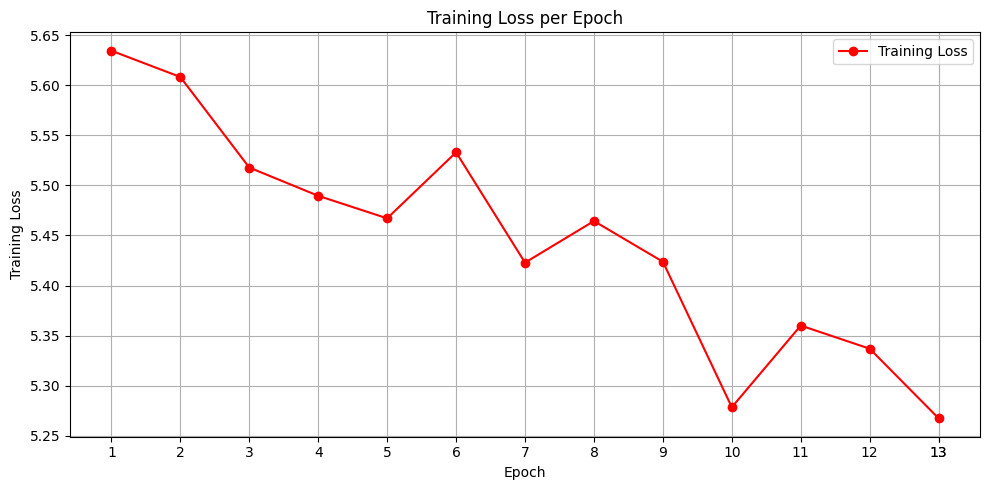

In [27]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_loss_per_epoch(df):
    """
    Plot the training loss per epoch from a DataFrame.
    
    Parameters:
    df (pd.DataFrame): DataFrame containing 'epoch' and 'loss' columns.
    """
    plt.figure(figsize=(10, 5))
    plt.plot(df['epoch'], df['loss'], marker='o', linestyle='-', color='r', label='Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Training Loss')
    plt.title('Training Loss per Epoch')
    plt.grid(True)
    plt.legend()
    plt.xticks(df['epoch'])  # Set x-axis ticks to be exactly the epoch values
    plt.tight_layout()
    plt.show()

plot_loss_per_epoch(df_train_log)

### INFERENCE

In [28]:
#input_prompt = "too much of it feels unfocused and underdeveloped . [negation] too much of it feels [BLANK] and underdeveloped"
input_prompt = "Her decision is rational. <|perturb|> [negation] Her decision is [BLANK]"

# To perturb with more controls,
#random_blanks = ["His behavior is always [BLANK]", " His behavior is [BLANK]"]

#input_prompt = "His behavior is always responsible. [negation] His behavior is [BLANK]"

#input_prompt = 'makes for a pretty pleasant viewing experience. <|perturb|> [negation] makes for a pretty [BLANK] viewing experience'
sequence = trainer.inference (input_prompt)
print(sequence)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
c:\Users\daria\anaconda3\envs\negation\lib\site-packages\peft\peft_model.py:1180: UserWarning: Position ids are not supported for parameter efficient tuning. Ignoring position ids.
  warnings.warn("Position ids are not supported for parameter efficient tuning. Ignoring position ids.")


['Her decision is rational. <|perturb|> [negation] Her decision is [BLANK]. [SEP] not [ANS', 'Her decision is rational. <|perturb|> [negation] Her decision is [BLANK]. [SEP] not without disasters', 'Her decision is rational. <|perturb|> [negation] Her decision is [BLANK]. [SEP] not without precedent']


In [18]:

# This section is making inference with the original model

def get_outputsx(model, inputs,do_sample=True,num_beams=None):

    num_return_sequences = 3

    outputs = model.generate(
        input_ids=inputs["input_ids"],
        attention_mask=inputs["attention_mask"],
        max_length=1000,
        #repetition_penalty=1.5, #Avoid repetition.
        early_stopping=False, #if num_beams is None else True, #The model can stop before reach the max_length
        temperature= 1,
        num_beams=1 if num_beams is None else num_beams,
        do_sample=num_beams is None and do_sample,
        num_return_sequences=num_return_sequences,
        #eos_token_id=tokenizer.eos_token_id
    )
    return outputs

model_name = "uw-hai/polyjuice"
foundational_model=AutoModelForCausalLM.from_pretrained(model_name)
tokenizer=AutoTokenizer.from_pretrained(model_name)

#text = "The project is sustainable."
#random_blanks = {'The project is [BLANK]', '[BLANK] project is sustainable'}

#input_prompt = tokenizer("The man drank from the tap. <|perturb|> [negation] The man [BLANK] from the tap.", return_tensors="pt")
input_prompt = tokenizer("His behavior is always responsible. <|perturb|> [negation] His behavior is [BLANK]", return_tensors="pt")
#input_prompt = tokenizer("The project is sustainable. <|perturb|> [negation] The project is [BLANK].", return_tensors="pt")
#input_prompt = tokenizer("Her decision is rational. <|perturb|> [negation] Her decision is [BLANK]", return_tensors="pt")
foundational_outputs_prompt = get_outputsx(foundational_model, input_prompt, num_beams = 5)

print(tokenizer.batch_decode(foundational_outputs_prompt, skip_special_tokens=True))

c:\Users\daria\anaconda3\envs\negation\lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


['His behavior is always responsible. [negation] His behavior is [BLANK] responsible. [SEP] not [ANSWER] ', 'His behavior is always responsible. [negation] His behavior is [BLANK] responsible. [SEP] never [ANSWER] ', 'His behavior is always responsible. [negation] His behavior is [BLANK] responsible. [SEP] not always [ANSWER] ']


In [4]:
from incontext import PerturbationGenerator

# Example usage
text = "Her decision is rational."
random_blanks = ['Her decision is [BLANK]']*2#, '[BLANK] project is sustainable'}

text = "Jim Lankes was given bottles of water, ice and rice"
random_blanks = ["Jim Lankes was given [BLANK] of water, ice and rice"]*2

generator = PerturbationGenerator()

prompts = generator.get_prompts(text, random_blanks)
print(prompts)

generated_sequences = generator.generate_on_prompts(prompts, temperature=1, num_beams=5, do_sample=True, batch_size=128, num_return_sequences=3)

print(generated_sequences)

listado = generator.validate_and_sample_perturbations(generated_sequences, text, perplex_thred=10, num_perturbations=4)
print(listado)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


['Jim Lankes was given bottles of water, ice and rice <|perturb|> [negation] Jim Lankes was given [BLANK] of water, ice and rice', 'Jim Lankes was given bottles of water, ice and rice <|perturb|> [negation] Jim Lankes was given [BLANK] of water, ice and rice']


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
INFO:polyjuice.polyjuice_wrapper:Setup SpaCy processor.


HERE
[[{'generated_text': 'Jim Lankes was given bottles of water, ice and rice <|perturb|> [negation] Jim Lankes was given [BLANK] of water, ice and rice [SEP] the role of Joey Ellis, who would be introduced from his hometown as a friend [ANSWER] '}, {'generated_text': 'Jim Lankes was given bottles of water, ice and rice <|perturb|> [negation] Jim Lankes was given [BLANK] of water, ice and rice [SEP] the go-ahead [ANSWER] '}, {'generated_text': 'Jim Lankes was given bottles of water, ice and rice <|perturb|> [negation] Jim Lankes was given [BLANK] of water, ice and rice [SEP] the role of Joey Ellis, who would be introduced from his hometown as [ANSWER] '}], [{'generated_text': 'Jim Lankes was given bottles of water, ice and rice <|perturb|> [negation] Jim Lankes was given [BLANK] of water, ice and rice [SEP] the role of Joey Ellis, who would be introduced from his hometown as a friend [ANSWER] '}, {'generated_text': 'Jim Lankes was given bottles of water, ice and rice <|perturb|> [nega

INFO:polyjuice.polyjuice_wrapper:Setup perplexity scorer.


[]


In [ ]:
from polyjuice import Polyjuice
pj = Polyjuice(model_path="uw-hai/polyjuice", is_cuda=True)

# Example usage
text = "Her decision can me more rational."
random_blanks = ['Her decision is can be more [BLANK]','Her decision is can be [BLANK]']#, '[BLANK] project is sustainable'}

#text = "It is great for kids."
#random_blanks =  ["It is great for [BLANK]"]*2

#text = "It is great for kids."
#text = "His behavior is always responsible."

# To perturb with more controls,
#random_blanks = ["His behavior is always [BLANK]", " His behavior is [BLANK]"]

#text = "The project is sustainable."
#random_blanks = {'The project is [BLANK]', '[BLANK] project is sustainable'}

perturbations = pj.perturb(
    orig_sent=text,
    blanked_sent= random_blanks,
    ctrl_code="negation",
    # Customzie perplexity score. 
    perplex_thred=30,
    # number of perturbations to return
    num_perturbations=3,
    # the function also takes in additional arguments for huggingface generators.
    num_beams=5
)
perturbations

## Dataset with Affixal

In [182]:
import pandas as pd

# Specify the path to the pickle file
affixal_path = '../data/affixal/filtered_df.pkl'

# Load the DataFrame from the pickle file
filtered_df = pd.read_pickle(affixal_path)

# Display the first few rows of the DataFrame
filtered_df.head()

,index,dev_index,text,cues,judgment,is_important,negation_type,text_substituted
0,6,151,"a big , gorgeous , sprawling swashbuckler that...",uncomplicated [14],1,No,AFFIX,"a big , gorgeous , sprawling swashbuckler that..."
1,12,319,too much of it feels unfocused and underdevelo...,unfocused [5],0,Yes,AFFIX,too much of it feels focused and underdeveloped .
2,17,274,it 's hard to like a film about a guy who is u...,unlikeable [13],0,Yes,AFFIX,it 's hard to like a film about a guy who is u...
3,24,858,the film 's welcome breeziness and some unbeli...,unbelievably [7],1,No,AFFIX,the film 's welcome breeziness and some believ...
4,26,469,so unremittingly awful that labeling it a dog ...,unremittingly [1],0,No,AFFIX,so remittingly awful that labeling it a dog pr...


In [187]:
print(filtered_df.loc[0,'text'])
print(filtered_df.loc[0,'text_substituted'])

a big , gorgeous , sprawling swashbuckler that delivers its diversions in grand , uncomplicated fashion .
a big , gorgeous , sprawling swashbuckler that delivers its diversions in grand , complicated fashion .
